### Data source--https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time
Download data for flights in Jan 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]

In [3]:
jan_df = pd.read_csv("JAN_2019_ONTIME_REPORTING.csv")

In [4]:
jan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   583985 non-null  int64  
 1   MONTH                  583985 non-null  int64  
 2   DAY_OF_MONTH           583985 non-null  int64  
 3   DAY_OF_WEEK            583985 non-null  int64  
 4   FL_DATE                583985 non-null  object 
 5   OP_UNIQUE_CARRIER      583985 non-null  object 
 6   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 7   OP_CARRIER_FL_NUM      583985 non-null  int64  
 8   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  ORIGIN_CITY_NAME       583985 non-null  object 
 11  ORIGIN_STATE_ABR       583985 non-null  object 
 12  DEST_AIRPORT_ID        583985 non-null  int64  
 13  DEST                   583985 non-null  object 
 14  DEST_CITY_NAME         583985 non-nu

In [5]:
jan_df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 35
0,2019,1,6,7,2019-01-06,9E,20363,3280,10397,ATL,...,18.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,7,1,2019-01-07,9E,20363,3280,10397,ATL,...,19.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,8,2,2019-01-08,9E,20363,3280,10397,ATL,...,19.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,9,3,2019-01-09,9E,20363,3280,10397,ATL,...,19.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,10,4,2019-01-10,9E,20363,3280,10397,ATL,...,21.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN


### Look at what variables are

In [6]:
#OP_UNIQUE_CARRIER is the 2 letters or "letter + number" code to ID carrier, redundant
jan_df["OP_UNIQUE_CARRIER"].value_counts()

WN    111312
AA     77017
DL     73836
OO     64926
UA     46915
YX     25755
MQ     25699
B6     24443
OH     23169
AS     20744
9E     20198
YV     18346
NK     15222
EV     13195
F9      9647
HA      6798
G4      6763
Name: OP_UNIQUE_CARRIER, dtype: int64

In [7]:
#OP_CARRIER_AIRLINE_ID is a five # code to ID carrier
jan_df["OP_CARRIER_AIRLINE_ID"].value_counts()

19393    111312
19805     77017
19790     73836
20304     64926
19977     46915
20452     25755
20398     25699
20409     24443
20397     23169
19930     20744
20363     20198
20378     18346
20416     15222
20366     13195
20436      9647
19690      6798
20368      6763
Name: OP_CARRIER_AIRLINE_ID, dtype: int64

In [8]:
#ORIGIN_AIRPORT_ID is a five # code to ID airport
jan_df["ORIGIN_AIRPORT_ID"].value_counts().head() #there are 346 airports in the data set

10397    31155
13930    26216
11298    23063
11057    19100
11292    18507
Name: ORIGIN_AIRPORT_ID, dtype: int64

In [9]:
#ORIGIN is the three letters code to ID airport, redundant
jan_df["ORIGIN"].value_counts().head()

ATL    31155
ORD    26216
DFW    23063
CLT    19100
DEN    18507
Name: ORIGIN, dtype: int64

In [10]:
#ORIGIN_CITY_NAME also contains information of state, there are 340 cities
jan_df["ORIGIN_CITY_NAME"].value_counts().head()

Chicago, IL              32626
Atlanta, GA              31155
New York, NY             24357
Dallas/Fort Worth, TX    23063
Houston, TX              19596
Name: ORIGIN_CITY_NAME, dtype: int64

In [11]:
#Does departure delay always predicts arrival delay??
print(jan_df["DEP_DEL15"].value_counts())

0.0    468703
1.0     98927
Name: DEP_DEL15, dtype: int64


In [15]:
#high correspondance between departure delay(>=15mins) and arrival delay(>=15mins)...
#AND we normally won't know departure delay, until it's too late to plan 
mask = (jan_df["DEP_DEL15"] == 1) & (jan_df["ARR_DELAY"] >= 15)
len(jan_df[mask])
len(jan_df[mask])/len(jan_df[jan_df["DEP_DEL15"] == 1.0])

0.791371415286019

In [16]:
#18022 or 3.09% flights missing arrival delay data
print(jan_df["ARR_DELAY"].isna().sum())
print(round(jan_df["ARR_DELAY"].isna().sum()/len(jan_df), 3))

18022
0.031


### Why missing arrival delay?

In [17]:
#missing ARR_DELAY by airline, range from 0.6 to 7.8%
#but all airlines have missing values, not just particular airlines
mask = jan_df["ARR_DELAY"].isna()
miss_by_carrier = pd.DataFrame(jan_df[mask]["OP_UNIQUE_CARRIER"].value_counts().sort_index())
flights_by_carrier = pd.DataFrame(jan_df["OP_UNIQUE_CARRIER"].value_counts().sort_index())
df_combine = miss_by_carrier.merge(flights_by_carrier, left_index = True, right_index = True)
df_combine.rename(columns = {"OP_UNIQUE_CARRIER_x":"missing", "OP_UNIQUE_CARRIER_y":"total"}, inplace = True)
df_combine["pct_missing"] = round(df_combine["missing"]/df_combine["total"]*100, 2)
df_combine

,missing,total,pct_missing
9E,377,20198,1.87
AA,1663,77017,2.16
AS,540,20744,2.60
B6,1048,24443,4.29
DL,433,73836,0.59
EV,995,13195,7.54
F9,157,9647,1.63
G4,69,6763,1.02
HA,13,6798,0.19
MQ,1989,25699,7.74


In [18]:
#missing ARR_DELAY by airport, seem to be random
print(len(jan_df[mask]["DEST"].value_counts().sort_values(ascending = False)))
print(len(jan_df["DEST"].value_counts().sort_values(ascending = False)))

307
346


In [19]:
#missing ARR_DELAY by day of week, seem to be relatively random
mask = jan_df["ARR_DELAY"].isna()
miss_by_dow = pd.DataFrame(jan_df[mask]["DAY_OF_WEEK"].value_counts().sort_index())
flights_by_dow = pd.DataFrame(jan_df["DAY_OF_WEEK"].value_counts().sort_index())
df_combine2 = miss_by_dow.merge(flights_by_dow, left_index = True, right_index = True)
df_combine2.rename(columns = {"DAY_OF_WEEK_x":"missing", "DAY_OF_WEEK_y":"total"}, inplace = True)
df_combine2["pct_missing"] = round(df_combine2["missing"]/df_combine2["total"]*100, 2)
df_combine2

,missing,total,pct_missing
1,2596,79401,3.27
2,3114,92796,3.36
3,3577,96920,3.69
4,2914,99387,2.93
5,1044,79698,1.31
6,2178,62324,3.49
7,2599,73459,3.54


### Select relavent variables

In [20]:
jan_df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'ARR_DELAY_GROUP', 'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'Unnamed: 35'],
      dtype='object')

In [21]:
jan_subset = jan_df.loc[:, ("MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "FL_DATE", "OP_CARRIER_AIRLINE_ID",
                    "OP_CARRIER_FL_NUM", "ORIGIN_AIRPORT_ID", "ORIGIN_CITY_NAME", "ORIGIN_STATE_ABR", 
                    "DEST_AIRPORT_ID","DEST_CITY_NAME", "DEST_STATE_ABR", "CRS_DEP_TIME", "CRS_ARR_TIME", 
                    "ARR_DELAY", "AIR_TIME", "DISTANCE")]
jan_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MONTH                  583985 non-null  int64  
 1   DAY_OF_MONTH           583985 non-null  int64  
 2   DAY_OF_WEEK            583985 non-null  int64  
 3   FL_DATE                583985 non-null  object 
 4   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 5   OP_CARRIER_FL_NUM      583985 non-null  int64  
 6   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 7   ORIGIN_CITY_NAME       583985 non-null  object 
 8   ORIGIN_STATE_ABR       583985 non-null  object 
 9   DEST_AIRPORT_ID        583985 non-null  int64  
 10  DEST_CITY_NAME         583985 non-null  object 
 11  DEST_STATE_ABR         583985 non-null  object 
 12  CRS_DEP_TIME           583985 non-null  int64  
 13  CRS_ARR_TIME           583985 non-null  int64  
 14  ARR_DELAY              565963 non-nu

### Remove all records with missing ARR_DELAY, and categorize it into 0 and 1 (target)

In [22]:
mask = jan_subset["ARR_DELAY"].notnull()
jan_subset = jan_subset[mask]

(565963, 17)


In [23]:
#rename columns
jan_subset.rename(columns = {"DAY_OF_MONTH":"DAY", "OP_CARRIER_AIRLINE_ID":"AIRLINE_ID",
                             "OP_CARRIER_FL_NUM":"FLIGHT_NUM", "ORIGIN_CITY_NAME":"ORIGIN_CITY", 
                             "ORIGIN_STATE_ABR":"ORIGIN_STATE","DEST_CITY_NAME":"DEST_CITY", 
                             "DEST_STATE_ABR":"DEST_STATE"}, inplace = True)

In [24]:
#check missing values in other variables
jan_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565963 entries, 0 to 583984
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MONTH              565963 non-null  int64  
 1   DAY                565963 non-null  int64  
 2   DAY_OF_WEEK        565963 non-null  int64  
 3   FL_DATE            565963 non-null  object 
 4   AIRLINE_ID         565963 non-null  int64  
 5   FLIGHT_NUM         565963 non-null  int64  
 6   ORIGIN_AIRPORT_ID  565963 non-null  int64  
 7   ORIGIN_CITY        565963 non-null  object 
 8   ORIGIN_STATE       565963 non-null  object 
 9   DEST_AIRPORT_ID    565963 non-null  int64  
 10  DEST_CITY          565963 non-null  object 
 11  DEST_STATE         565963 non-null  object 
 12  CRS_DEP_TIME       565963 non-null  int64  
 13  CRS_ARR_TIME       565963 non-null  int64  
 14  ARR_DELAY          565963 non-null  float64
 15  AIR_TIME           565963 non-null  float64
 16  DI

In [25]:
#check for duplicates, no duplicate
jan_subset.duplicated().sum()

0

In [26]:
#binarize ARR_DELAY by cutting off at 15min delay
jan_subset["ARR_DEL15"] = np.where(jan_subset["ARR_DELAY"] < 15, 0, 1)
print(jan_subset.shape)
#jan_subset.columns

(565963, 18)


### SAVE data 

In [27]:
jan_subset.to_pickle("/Users/sarazzzz/Desktop/Metis/CAMP/Metis_project3/interim_data/jan_subset_v1")

### Continue EDA by reading in this dataframe

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]

In [29]:
jan_subset = pd.read_pickle("interim_data/jan_subset_v1")

### Look at flight delay >= 15min by airlines and also >= 60min

In [30]:
#% of flights that have delay > 15min (or 60min)
print(round(len(jan_subset[jan_subset["ARR_DELAY"] >= 15])/len(jan_subset), 3))
print(round(len(jan_subset[jan_subset["ARR_DELAY"] >= 60])/len(jan_subset), 3))

0.186
0.062


In [31]:
mask = jan_subset["ARR_DELAY"] >= 15
delay_15 = pd.DataFrame(jan_subset[mask].groupby(["AIRLINE_ID"])["ARR_DELAY"].count().sort_index())

total = pd.DataFrame(jan_subset.groupby(["AIRLINE_ID"])["ARR_DELAY"].count().sort_index())
delay_by_carrier = delay_15.merge(total, on = "AIRLINE_ID")

delay_by_carrier.rename(columns = {"ARR_DELAY_x":"flight_delay", "ARR_DELAY_y":"total"}, inplace = True)
delay_by_carrier["pct_delay"] = round(delay_by_carrier["flight_delay"]/delay_by_carrier["total"] * 100, 2)
delay_by_carrier["diff_from_avg"] = delay_by_carrier["pct_delay"] - 18.6
delay_by_carrier.sort_values("pct_delay")

,flight_delay,total,pct_delay,diff_from_avg
AIRLINE_ID,,,,
19690,851,6785,12.54,-6.06
19790,9403,73403,12.81,-5.79
19393,16111,107235,15.02,-3.58
20397,3475,22369,15.53,-3.07
20416,2383,15009,15.88,-2.72
19930,3506,20204,17.35,-1.25
19805,13741,75354,18.24,-0.36
20378,3310,17829,18.57,-0.03
19977,9156,46126,19.85,1.25


### Get airline names

In [32]:
airlines = pd.read_csv("CARRIER_ID.csv")
airlines.info()
delay_by_carrier = delay_by_carrier.merge(airlines, left_on = "AIRLINE_ID", right_on = "Code")

delay_by_carrier["Description"] = [x.split(":")[0] for x in delay_by_carrier["Description"]]
delay_by_carrier = delay_by_carrier.sort_values("pct_delay")
delay_by_carrier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1678 non-null   int64 
 1   Description  1678 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.3+ KB


,flight_delay,total,pct_delay,diff_from_avg,Code,Description
1,851,6785,12.54,-6.06,19690,Hawaiian Airlines Inc.
2,9403,73403,12.81,-5.79,19790,Delta Air Lines Inc.
0,16111,107235,15.02,-3.58,19393,Southwest Airlines Co.
11,3475,22369,15.53,-3.07,20397,PSA Airlines Inc.
14,2383,15009,15.88,-2.72,20416,Spirit Air Lines
4,3506,20204,17.35,-1.25,19930,Alaska Airlines Inc.
3,13741,75354,18.24,-0.36,19805,American Airlines Inc.
10,3310,17829,18.57,-0.03,20378,Mesa Airlines Inc.
5,9156,46126,19.85,1.25,19977,United Air Lines Inc.
7,4013,19821,20.25,1.65,20363,Endeavor Air Inc.


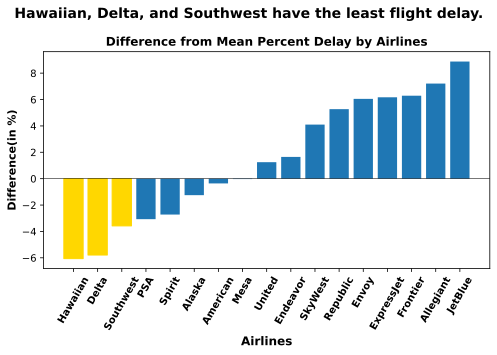

In [33]:
plt.figure(figsize = [7, 5])
barlist = plt.bar(delay_by_carrier["Description"], delay_by_carrier["diff_from_avg"])
for bar in range(3):
    barlist[bar].set_color("gold")
plt.suptitle("Hawaiian, Delta, and Southwest have the least flight delay.", fontsize = 14, weight = "bold")
plt.title("Difference from Mean Percent Delay by Airlines", fontsize = 12, weight = "bold")
plt.ylabel("Difference(in %)", fontsize = 11, weight = "bold")
plt.axhline(y = 0, linewidth = 0.5, color = "black")

plt.xlabel("Airlines", fontsize = 12, weight = "bold")
xtick_lab = [x.split()[0] for x in delay_by_carrier["Description"]]
plt.xticks(ticks = list(range(17)), labels = xtick_lab, weight = "bold", rotation = 60)
plt.tight_layout();
#plt.savefig("diff_from_avg_percent_delay_airlines.svg");

### Airlines "ranking" with flight delay of >= 1 hour

In [35]:
mask = jan_subset["ARR_DELAY"] >= 60
delay_60 = pd.DataFrame(jan_subset[mask].groupby(["AIRLINE_ID"])["ARR_DELAY"].count().sort_index())
#delay_60
total = pd.DataFrame(jan_subset.groupby(["AIRLINE_ID"])["ARR_DELAY"].count().sort_index())
delay60_carrier = delay_60.merge(total, on = "AIRLINE_ID")
delay60_carrier
delay60_carrier.rename(columns = {"ARR_DELAY_x":"flight_delay60", "ARR_DELAY_y":"total"}, inplace = True)
delay60_carrier["pct_delay60"] = round(delay60_carrier["flight_delay60"]/delay60_carrier["total"] * 100, 2)
delay60_carrier.sort_values("pct_delay60")

,flight_delay60,total,pct_delay60
AIRLINE_ID,,,
19690,107,6785,1.58
19393,3500,107235,3.26
19790,2941,73403,4.01
20397,1036,22369,4.63
19930,979,20204,4.85
19805,3671,75354,4.87
20416,792,15009,5.28
20378,1121,17829,6.29
20368,479,6694,7.16


In [36]:
delay60_carrier = delay60_carrier.merge(airlines, left_on = "AIRLINE_ID", right_on = "Code")
delay60_carrier["Description"] = [x.split(":")[0] for x in delay60_carrier["Description"]]
delay60_carrier = delay60_carrier.sort_values("pct_delay60")
delay60_carrier.head()

,flight_delay60,total,pct_delay60,Code,Description
1,107,6785,1.58,19690,Hawaiian Airlines Inc.
0,3500,107235,3.26,19393,Southwest Airlines Co.
2,2941,73403,4.01,19790,Delta Air Lines Inc.
11,1036,22369,4.63,20397,PSA Airlines Inc.
4,979,20204,4.85,19930,Alaska Airlines Inc.


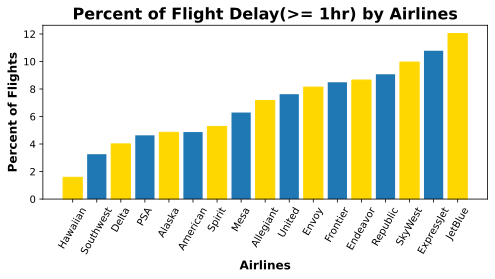

In [37]:
plt.figure(figsize = [7, 4])
barlist = plt.bar(delay60_carrier["Description"], delay60_carrier["pct_delay60"])
for bar in range(0, len(barlist), 2):
    barlist[bar].set_color("gold")
plt.title("Percent of Flight Delay(>= 1hr) by Airlines", fontsize = 16, weight = "bold")
plt.ylabel("Percent of Flights", fontsize = 12, weight = "bold")

plt.xlabel("Airlines", fontsize = 12, weight = "bold")
xtick_lab = [x.split()[0] for x in delay60_carrier["Description"]]
plt.xticks(ticks = list(range(17)), labels = xtick_lab, rotation = 60);
plt.tight_layout();
#plt.savefig("flight_delay_1hr_airlines.svg");

### Look at flight delay by the 10 busiest (by counting number of arrival flights) destination airports 

In [38]:
top_ten = pd.DataFrame(jan_subset.groupby(["DEST_AIRPORT_ID"])["ARR_DELAY"]\
                       .count().sort_values(ascending = False)[:10])
indices = list(top_ten.index.values)

mask = (jan_subset["ARR_DELAY"] >= 15) & (jan_subset["DEST_AIRPORT_ID"].isin(indices))
delay_by_dest = pd.DataFrame(jan_subset[mask].groupby(["DEST_AIRPORT_ID"])["ARR_DELAY"].count())

top_ten = top_ten.merge(delay_by_dest, on = "DEST_AIRPORT_ID")
top_ten.rename(columns = {"ARR_DELAY_x":"total", "ARR_DELAY_y":"flight_delay"}, inplace = True)

top_ten["pct_delay"] = round(top_ten["flight_delay"]/top_ten["total"] * 100, 2)
top_ten["diff_from_avg"] = top_ten["pct_delay"] - 18.6
top_ten = top_ten.sort_values("diff_from_avg", ascending = False)

### Get airport names

In [39]:
airports = pd.read_csv("AIRPORT_ID.csv")
airports.info()
top_ten = top_ten.merge(airports, left_on = "DEST_AIRPORT_ID", right_on = "Code")
top_ten["Description"] = [x.split(":")[1] for x in top_ten["Description"]]
top_ten

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6553 entries, 0 to 6552
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         6553 non-null   int64 
 1   Description  6553 non-null   object
dtypes: int64(1), object(1)
memory usage: 102.5+ KB


,total,flight_delay,pct_delay,diff_from_avg,Code,Description
0,13344,4836,36.24,17.64,12953,LaGuardia
1,13063,3642,27.88,9.28,14771,San Francisco International
2,23262,6441,27.69,9.09,13930,Chicago O'Hare International
3,22723,4282,18.84,0.24,11298,Dallas/Fort Worth International
4,17655,3263,18.48,-0.12,12892,Los Angeles International
5,18232,3025,16.59,-2.01,11292,Denver International
6,14427,2175,15.08,-3.52,12266,George Bush Intercontinental/Houston
7,18781,2648,14.10,-4.50,11057,Charlotte Douglas International
8,14552,2041,14.03,-4.57,14107,Phoenix Sky Harbor International
9,30797,3931,12.76,-5.84,10397,Hartsfield-Jackson Atlanta International


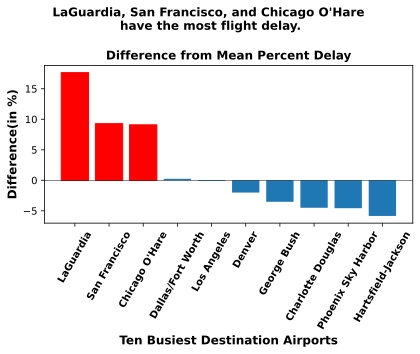

In [40]:
plt.figure(figsize = [6, 5])
barlist = plt.bar(top_ten["Description"], top_ten["diff_from_avg"])
for bar in range(3):
    barlist[bar].set_color("red")
plt.suptitle("LaGuardia, San Francisco, and Chicago O'Hare \nhave the most flight delay.", fontsize = 12, weight = "bold")
plt.title("Difference from Mean Percent Delay", fontsize = 12, weight = "bold")
plt.ylabel("Difference(in %)", fontsize = 12, weight = "bold")
plt.axhline(y = 0, linewidth = 0.5, color = "black")

plt.xlabel("Ten Busiest Destination Airports", fontsize = 12, weight = "bold")
xtick_lab = ["LaGuardia", "San Francisco", "Chicago O'Hare", "Dallas/Fort Worth", "Los Angeles",
            "Denver", "George Bush", "Charlotte Douglas", "Phoenix Sky Harbor", "Hartsfield-Jackson"]
plt.xticks(ticks = list(range(10)), labels = xtick_lab, weight = "bold", rotation = 60)
plt.tight_layout();
#plt.savefig("diff_from_avg_percent_delay_airports.svg");

In [41]:
#does the busiest airports have more delays than avg? 20.2% vs 18.6%, but majority under avg
top_ten["pct_delay"].mean()

20.169

In [42]:
#the ten busiest airports account for 33% of the total flights
round(top_ten["total"].sum()/len(jan_subset) * 100, 1)

33.0

### Delay >= 1hr for top 10 busiest destination airports

In [43]:
top_ten_60 = pd.DataFrame(jan_subset.groupby(["DEST_AIRPORT_ID"])["ARR_DELAY"]\
                          .count().sort_values(ascending = False)[:10])
indices = list(top_ten_60.index.values)

mask = (jan_subset["ARR_DELAY"] >= 60) & (jan_subset["DEST_AIRPORT_ID"].isin(indices))
delay60_dest = pd.DataFrame(jan_subset[mask].groupby(["DEST_AIRPORT_ID"])["ARR_DELAY"].count())

top_ten_60 = top_ten_60.merge(delay60_dest, on = "DEST_AIRPORT_ID")

top_ten_60.rename(columns = {"ARR_DELAY_x":"total", "ARR_DELAY_y":"flight_delay60"}, inplace = True)
top_ten_60["pct_delay"] = round(top_ten_60["flight_delay60"]/top_ten_60["total"] * 100, 2)
top_ten_60 = top_ten_60.sort_values("total", ascending = False)

top_ten_60 = top_ten_60.merge(airports, left_on = "DEST_AIRPORT_ID", right_on = "Code")
top_ten_60["Description"] = [x.split(":")[1] for x in top_ten_60["Description"]]
top_ten_60

,total,flight_delay60,pct_delay,Code,Description
0,30797,1096,3.56,10397,Hartsfield-Jackson Atlanta International
1,23262,2921,12.56,13930,Chicago O'Hare International
2,22723,1179,5.19,11298,Dallas/Fort Worth International
3,18781,760,4.05,11057,Charlotte Douglas International
4,18232,948,5.20,11292,Denver International
5,17655,967,5.48,12892,Los Angeles International
6,14552,522,3.59,14107,Phoenix Sky Harbor International
7,14427,629,4.36,12266,George Bush Intercontinental/Houston
8,13344,2228,16.70,12953,LaGuardia
9,13063,1823,13.96,14771,San Francisco International


In [44]:
#JFK is not one of the ten busiest destination airports in Jan...o.O...
airports[airports["Description"].str.contains("John F. Kennedy")]

,Code,Description
2381,12478,"New York, NY: John F. Kennedy International"


In [45]:
mask = jan_subset["DEST_AIRPORT_ID"] == 12478
jan_subset[mask]["ARR_DELAY"].count()

10245

### Convert CRS_ARR_TIME into a categorical variable

In [46]:
jan_subset["CRS_ARR_TIME"].value_counts().sort_index() 

1        231
2        187
3        111
4        163
5        301
        ... 
2356     364
2357     366
2358     586
2359    1217
2400      35
Name: CRS_ARR_TIME, Length: 1353, dtype: int64

In [47]:
#converting scheduled arrival time to hours only
import math
jan_subset["ARR_TIME_HR"] = [math.modf(time/100)[1] for time in jan_subset["CRS_ARR_TIME"]]

#combining flights at midnight with fligth before 1AM
jan_subset.loc[jan_subset["ARR_TIME_HR"] == 24.0, "ARR_TIME_HR"] = 0.0
jan_subset["ARR_TIME_HR"].value_counts()

17.0    35947
16.0    35888
10.0    35296
13.0    35264
21.0    35227
14.0    34859
19.0    34652
15.0    34324
18.0    34013
20.0    33708
11.0    33646
12.0    32933
9.0     32298
8.0     26838
23.0    26483
22.0    26152
7.0     19194
6.0      7285
0.0      6704
5.0      3107
4.0       868
1.0       766
2.0       335
3.0       176
Name: ARR_TIME_HR, dtype: int64

In [48]:
#also convert scheduled departure time to hours
jan_subset["DEP_TIME_HR"] = [math.modf(time/100)[1] for time in jan_subset["CRS_DEP_TIME"]]

In [49]:
jan_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565963 entries, 0 to 583984
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MONTH              565963 non-null  int64  
 1   DAY                565963 non-null  int64  
 2   DAY_OF_WEEK        565963 non-null  int64  
 3   FL_DATE            565963 non-null  object 
 4   AIRLINE_ID         565963 non-null  int64  
 5   FLIGHT_NUM         565963 non-null  int64  
 6   ORIGIN_AIRPORT_ID  565963 non-null  int64  
 7   ORIGIN_CITY        565963 non-null  object 
 8   ORIGIN_STATE       565963 non-null  object 
 9   DEST_AIRPORT_ID    565963 non-null  int64  
 10  DEST_CITY          565963 non-null  object 
 11  DEST_STATE         565963 non-null  object 
 12  CRS_DEP_TIME       565963 non-null  int64  
 13  CRS_ARR_TIME       565963 non-null  int64  
 14  ARR_DELAY          565963 non-null  float64
 15  AIR_TIME           565963 non-null  float64
 16  DI

In [21]:
#save data for analysis later
jan_subset.to_pickle("/Users/sarazzzz/Desktop/Metis/CAMP/Metis_project3/interim_data/jan_subset_v2")